In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%matplotlib inline
%matplotlib notebook

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import pandas as pd
import cufflinks as cf

import plotly.plotly as py

# SciPy & NumPy

In [18]:
s = sp.randn(100)
print(len(s))
print("Mean : {0:8.6f}".format(s.mean()))

Mean : 0.115381


# pandas

In [20]:
df = pd.read_csv("https://plot.ly/~MattSundquist/20387.csv")
df.describe()

/Users/gabrielus/.pyenv/versions/3.5.1/envs/plotly/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



line0_volts  line0_time, line1_time, line3_time   line1_volts  \
count   200.000000                          200.000000  2.000000e+02   
mean      0.434498                            0.995000 -1.665335e-18   
std       0.243705                            0.578792  7.088812e-01   
min       0.136695                            0.000000 -1.000000e+00   
25%       0.224812                            0.497500 -6.956525e-01   
50%       0.369728                            0.995000  6.123234e-17   
75%       0.608055                            1.492500  6.956525e-01   
max       1.000000                            1.990000  1.000000e+00   

       line2_volts  line2_time   line3_volts  
count    20.000000   20.000000  2.000000e+02  
mean      0.620175    0.950000  6.708533e-02  
std       0.324605    0.591608  3.402314e-01  
min       0.000000    0.000000 -4.781305e-01  
25%            NaN         NaN -1.651344e-01  
50%            NaN         NaN  3.713929e-17  
75%            NaN         NaN  2.722606e-01  
max       1.064711    1.900000  7.883040e-01

In [28]:
df.columns = ["volts_1", "time_1", "volts_2", "volts_2",
                "time_2", "volts_4"]

In [27]:
df.volts_1.std()
df.std()

volts_1    0.243705
time_1     0.578792
volts_2    0.708881
volts_2    0.324605
time_2     0.591608
volts_4    0.340231
dtype: float64

# matplotlib

<IPython.core.display.Javascript object>


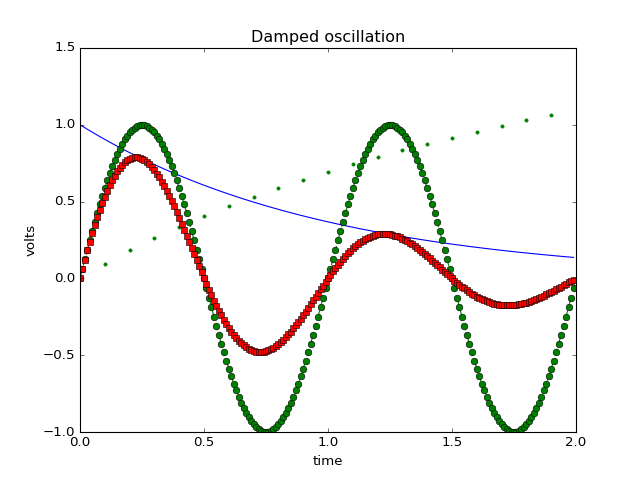

In [30]:
fig1 = plt.figure()
# Make a legend for specific lines.
import matplotlib.pyplot as plt
import numpy as np


t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')

plt.show()

In [31]:
py.iplot_mpl(fig1, strip_style = True, filename='examples/damped_oscillation')

In [39]:
import mpld3
mpld3.display(fig1)

# Interactive Maps

In [43]:
df = pd.read_csv('https://plot.ly/~Dreamshot/5718/electoral-college-votes-by-us-state/.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

# change column names
df.columns = ["state", "votes"]

df.head()

In [49]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] 
    
data = [dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = df['state'],
    z = df['votes'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    hoverinfo = 'location+z',
    marker = dict(
        line = dict (
            color = 'rgb(255,255,255)',
            width = 2
        )
    ),
    colorbar = dict(
        title = "Votes"
    )
)]

layout = dict(
    title = '2016 Electoral College Votes',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'
    )
)
    
fig = dict(data=data, layout=layout)

In [50]:
py.iplot(fig, validate=False, filename='examples/electoral-map')

# Seaborn